Toy Example
===========

In [1]:
import scanpy as sc
import singleCellHaystack as hs

sc.set_figure_params(facecolor="white", dpi=90)

## Load toy data

In [2]:
adata = hs.load_toy()
adata

AnnData object with n_obs × n_vars = 601 × 500
    obsm: 'X_tsne'

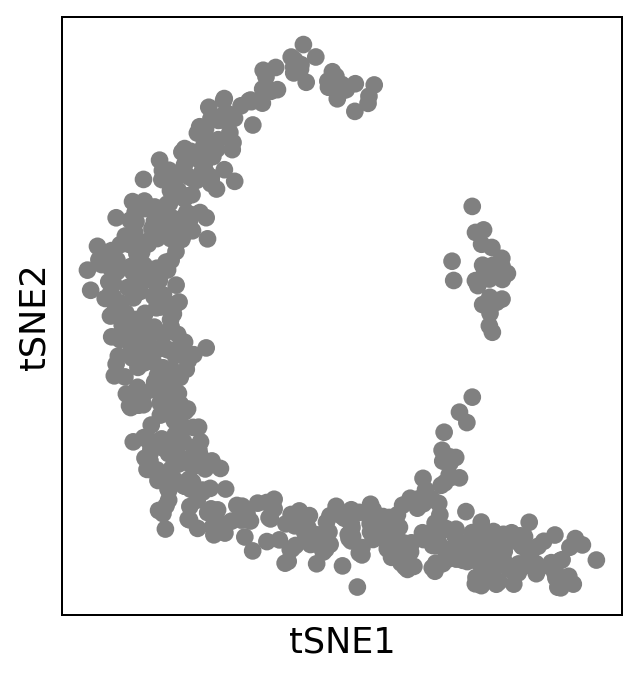

In [3]:
sc.pl.scatter(adata, basis="tsne")

## Run haystack

In [4]:
res = hs.haystack(adata, coord="tsne", n_randomizations=100, n_genes_to_randomize=100, spline_method="ns")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 features ...


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7301.81it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 81.12it/s]


> calculating P values ...
> done.


## QC

We can examine some of the QC plots. First the randomization fits. These are used to calculate KLD from randomized expression levels for a subset of genes, in order to estimate the values to the entire gene set.

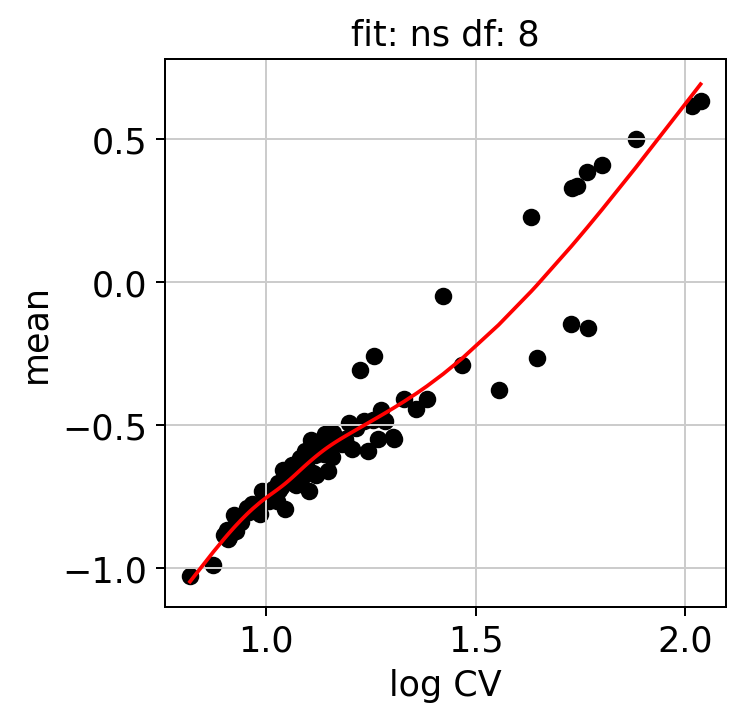

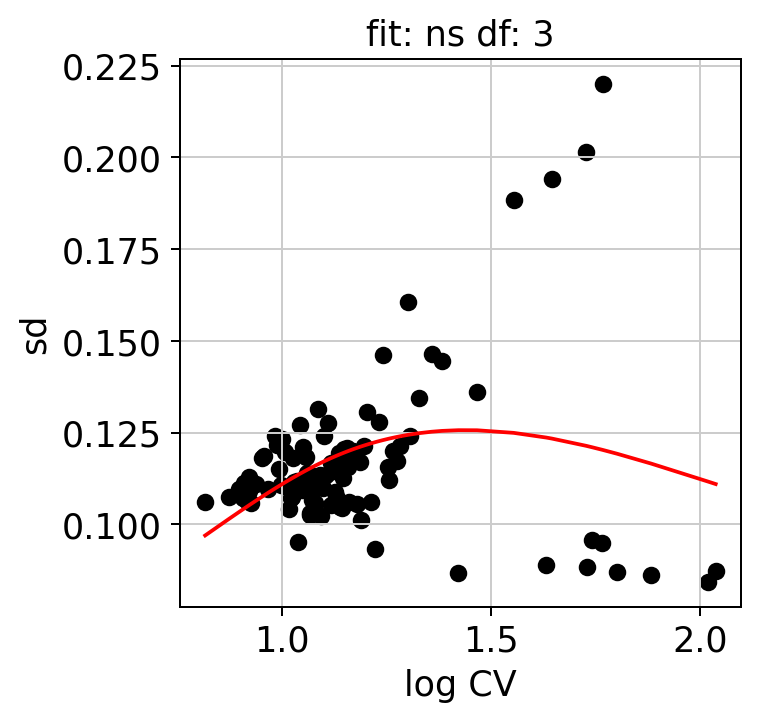

In [5]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

The ranking of logpval and distribution of pval gives us some idea of how many significant genes we can detect.

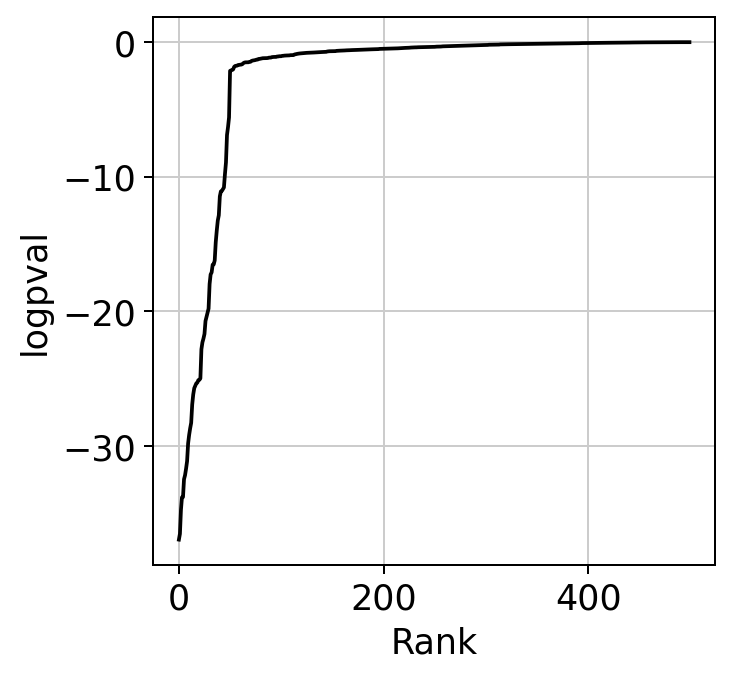

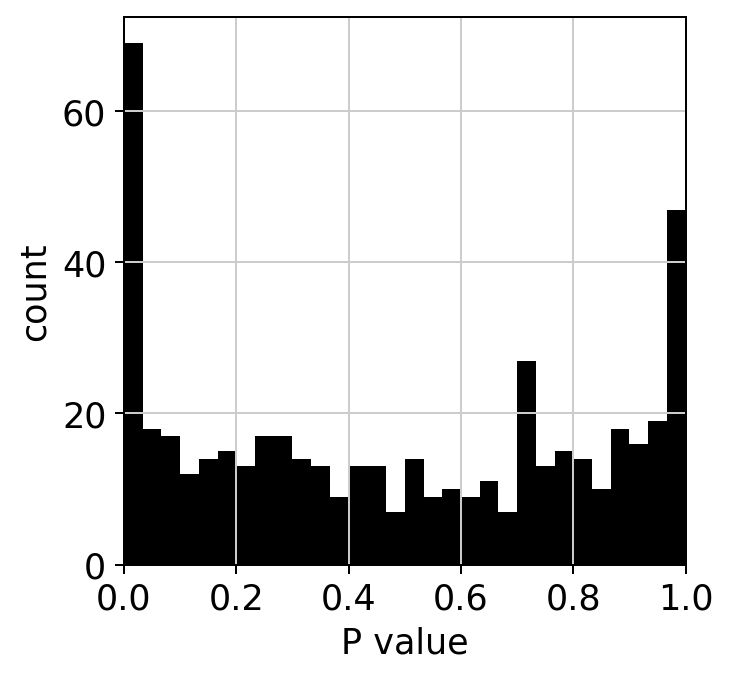

In [6]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

## Results

A pandas DataFrame with the results can be obtained. By default the results are sorted by logpval_adj.

In [7]:
import pandas as pd

In [8]:
sum = res.top_features(10)
sum

,gene,KLD,CV,pval,pval_adj,logpval,logpval_adj
241,gene_242,1.738191,2.627666,1.066598e-37,5.332992e-35,-36.971999,-34.273029
338,gene_339,1.861424,2.718406,2.894843e-37,1.447422e-34,-36.538375,-33.839405
496,gene_497,2.007779,2.860687,1.749626e-35,8.748131e-33,-34.757055,-32.058085
274,gene_275,1.733409,2.698842,1.510932e-34,7.554659e-32,-33.820755,-31.121785
350,gene_351,1.849559,2.781079,1.538332e-34,7.691660e-32,-33.812950,-31.113980
61,gene_62,2.027718,2.931154,3.283019e-33,1.641509e-30,-32.483727,-29.784757
136,gene_137,1.791516,2.784830,6.520173e-33,3.260087e-30,-32.185741,-29.486771
316,gene_317,1.762123,2.776867,1.982998e-32,9.914989e-30,-31.702678,-29.003708
243,gene_244,1.664939,2.719325,7.226574e-32,3.613287e-29,-31.141068,-28.442098
78,gene_79,2.238983,3.174348,1.517525e-30,7.587625e-28,-29.818864,-27.119894


Plot top 4 genes.

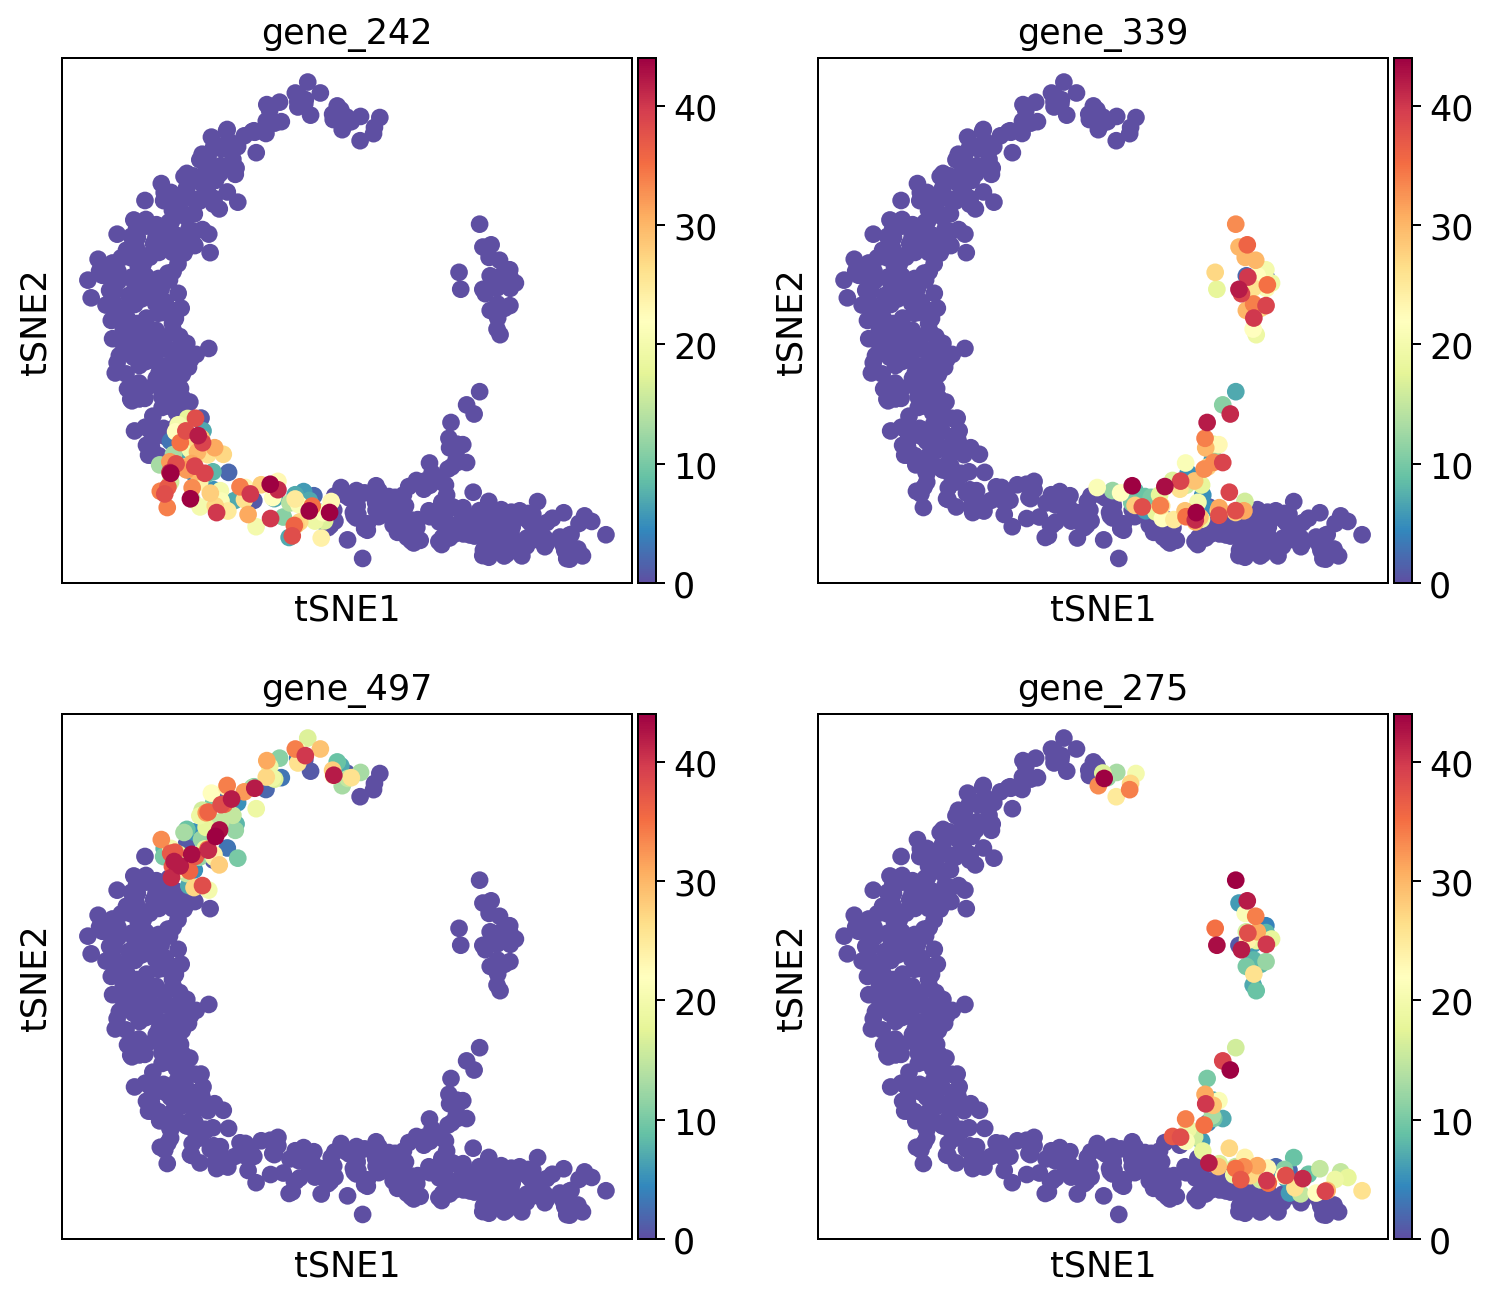

In [9]:
sc.pl.tsne(adata, color=sum.gene.iloc[:4], ncols=2, cmap="Spectral_r")

## Export results

In [10]:
#sum.to_csv("toy-results.tsv")